In [180]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline



In [181]:
exchange_rates = pd.read_csv('euro-daily.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-09-27,1.618,1.9558,6.0668,1.5036,0.942,7.823,NaN,25.158,7.457,...,4.9764,NaN,11.273,1.4305,NaN,NaN,36.135,38.1336,1.1158,19.1092
1,2024-09-26,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,NaN,25.159,7.4572,...,4.9759,NaN,11.3,1.4328,NaN,NaN,36.215,38.1022,1.1155,19.238
2,2024-09-25,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,NaN,25.123,7.4575,...,4.9760,NaN,11.311,1.4378,NaN,NaN,36.599,38.2090,1.1194,19.1932
3,2024-09-24,1.6237,1.9558,6.137,1.5033,0.9439,7.829,NaN,25.155,7.4571,...,4.9756,NaN,11.2935,1.4341,NaN,NaN,36.569,38.0064,1.1133,19.2869
4,2024-09-23,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,NaN,25.098,7.4581,...,4.9742,NaN,11.362,1.4357,NaN,NaN,36.654,37.9745,1.1119,19.3253


In [182]:
exchange_rates.shape

(6655, 41)

In [183]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6655 non-null   object 
 1   [Australian dollar ]      6655 non-null   object 
 2   [Bulgarian lev ]          6253 non-null   object 
 3   [Brazilian real ]         6387 non-null   object 
 4   [Canadian dollar ]        6655 non-null   object 
 5   [Swiss franc ]            6655 non-null   object 
 6   [Chinese yuan renminbi ]  6387 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6655 non-null   object 
 9   [Danish krone ]           6655 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6655 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6655 non-null   object 
 14  [Croatia

DATA CLEANING

In [205]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', '[Indian rupee ]' : 'INR', '[Australian dollar ]': 'AUS', '[Canadian dollar ]': 'CAN', '[UK pound sterling ]': 'GBP' , 'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,AUS,[Bulgarian lev ],[Brazilian real ],CAN,[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [185]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      6655 non-null   datetime64[ns]
 1   [Australian dollar ]      6655 non-null   object        
 2   [Bulgarian lev ]          6253 non-null   object        
 3   [Brazilian real ]         6387 non-null   object        
 4   [Canadian dollar ]        6655 non-null   object        
 5   [Swiss franc ]            6655 non-null   object        
 6   [Chinese yuan renminbi ]  6387 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           6655 non-null   object        
 9   [Danish krone ]           6655 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      6655 non-null   object        
 12  [Greek drachma ]    

In [186]:
euro_to_dollar = exchange_rates[['Time','US_dollar', 'INR']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

-         62
1.2276     9
1.0808     8
1.0867     8
1.1215     8
          ..
1.4741     1
1.4720     1
1.4554     1
1.4649     1
1.1121     1
Name: US_dollar, Length: 3798, dtype: int64

In [187]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

euro_to_dollar = euro_to_dollar[euro_to_dollar['INR'] != '-']
euro_to_dollar['INR'] = euro_to_dollar['INR'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6593 entries, 0 to 6654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6593 non-null   datetime64[ns]
 1   US_dollar  6593 non-null   float64       
 2   INR        6326 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 206.0 KB


In [188]:
euro_to_dollar.tail()

,Time,US_dollar,INR
6650,2024-09-23,1.1119,92.8955
6651,2024-09-24,1.1133,93.1510
6652,2024-09-25,1.1194,93.5750
6653,2024-09-26,1.1155,93.2970
6654,2024-09-27,1.1158,93.3840


ROLLING MEAN

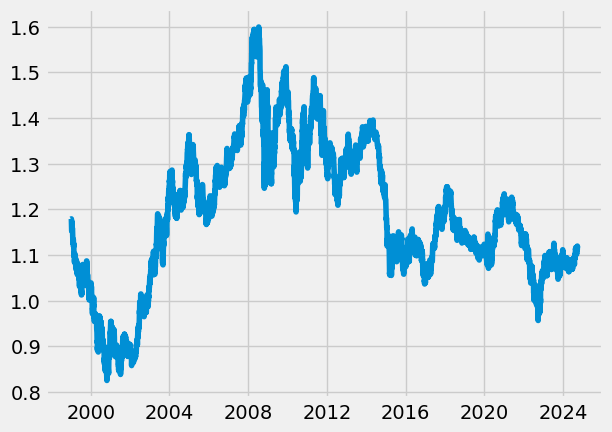

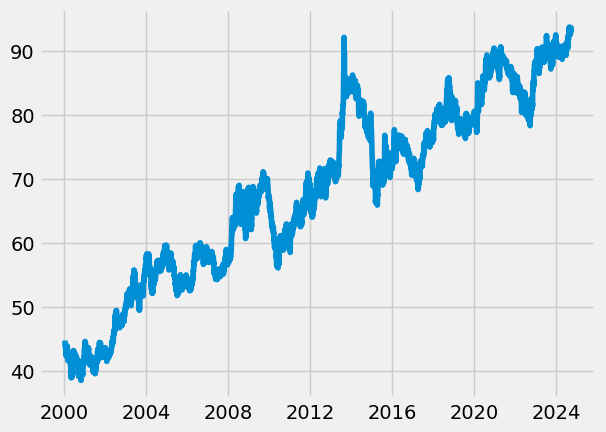

In [189]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

plt.plot(euro_to_dollar['Time'], euro_to_dollar['INR'])
plt.show()


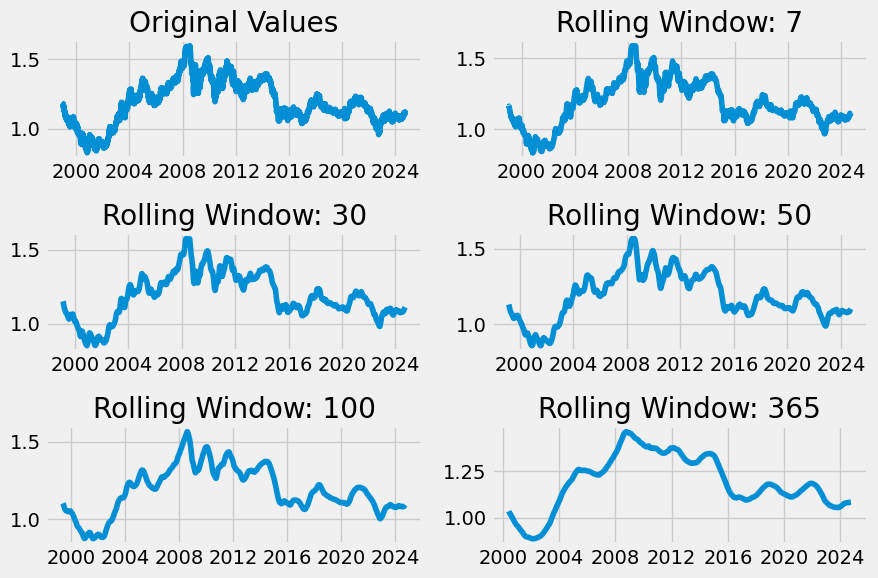

In [190]:
plt.figure(figsize=(9,6))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original Values', weight='bold')

for i, rolling_mean in zip([2,3,4,5,6], [7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], 
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window: '+ str(rolling_mean), weight='bold')

plt.tight_layout()
plt.show()

In [191]:
euro_to_dollar['rolling_mean_USD'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar['rolling_mean_INR'] = euro_to_dollar['INR'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,INR,rolling_mean_USD,rolling_mean_INR
0,1999-01-04,1.1789,NaN,NaN,NaN
1,1999-01-05,1.1790,NaN,NaN,NaN
2,1999-01-06,1.1743,NaN,NaN,NaN
3,1999-01-07,1.1632,NaN,NaN,NaN
4,1999-01-08,1.1659,NaN,NaN,NaN
...,...,...,...,...,...
6650,2024-09-23,1.1119,92.8955,1.108197,92.954023
6651,2024-09-24,1.1133,93.1510,1.108870,93.000357
6652,2024-09-25,1.1194,93.5750,1.109453,93.036107
6653,2024-09-26,1.1155,93.2970,1.109933,93.064723


# PROBABLE USE CASES

1) To show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020-2024 data and the 2016-2019 data as a baseline. We can use a line plot.
2) To show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
3) To show comparatively how the euro-dollar rate changed under the last three US presidents using a line plot.

# USE CASE 1 - PANDEMIC BASELINE

* To show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020-2024 data and the 2016-2019 data as a baseline. We can use a line plot.

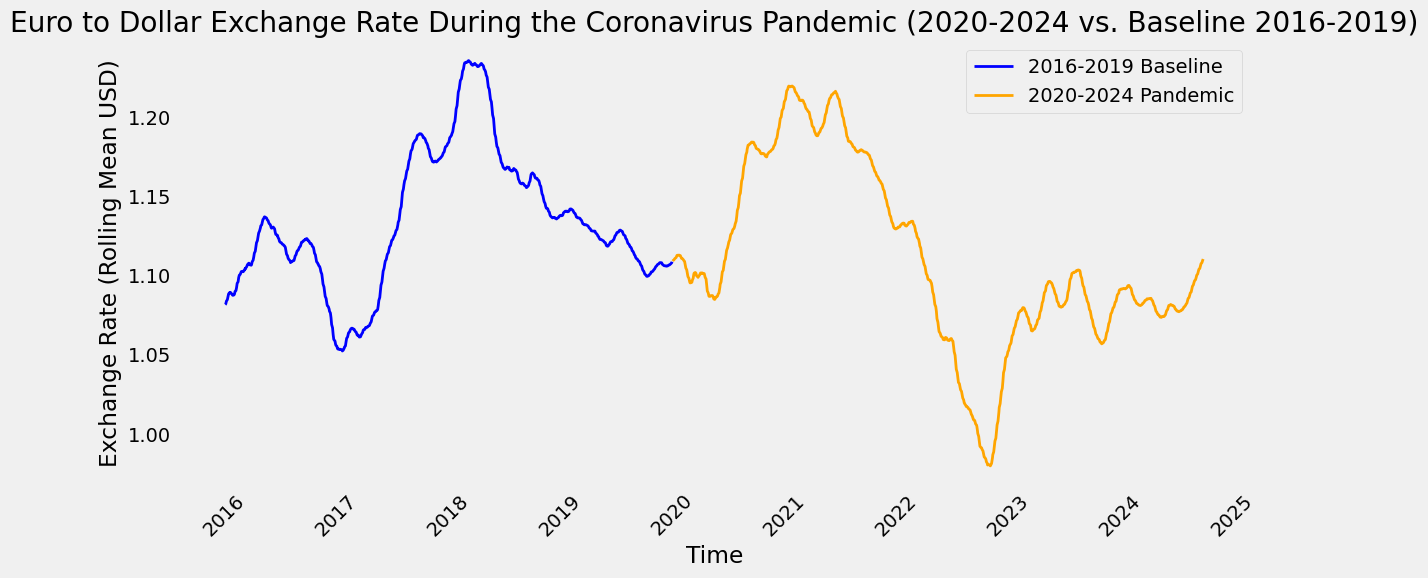

In [192]:
# Filter data for the pandemic (2020-2024) and baseline (2016-2019)
pandemic_data = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2020) & (euro_to_dollar['Time'].dt.year <= 2024)]
baseline_data = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2016) & (euro_to_dollar['Time'].dt.year <= 2019)]

# Set the style for the plot
style.use('fivethirtyeight')

# Create a plot
plt.figure(figsize=(12, 6))

# Plot baseline data
plt.plot(baseline_data['Time'], baseline_data['rolling_mean_USD'], label='2016-2019 Baseline', color='blue', linewidth=2)

# Plot pandemic data
plt.plot(pandemic_data['Time'], pandemic_data['rolling_mean_USD'], label='2020-2024 Pandemic', color='orange', linewidth=2)

# Adding labels and title
plt.title('Euro to Dollar Exchange Rate During the Coronavirus Pandemic (2020-2024 vs. Baseline 2016-2019)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate (Rolling Mean USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# USE CASE 2
FINANCIAL CRISIS EXAMPLE 

* To show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. 

In [193]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) &
                               (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar.Time.dt.year >= 2007) &
                               (euro_to_dollar.Time.dt.year <= 2008)]

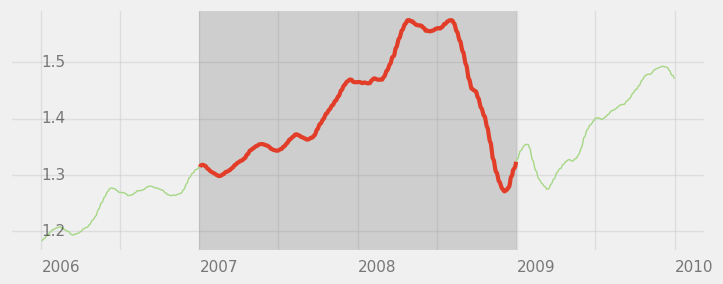

In [194]:
# Optional: Fill NaN values
financial_crisis['rolling_mean_USD'].fillna(method='ffill', inplace=True)
financial_crisis_7_8['rolling_mean_USD'].fillna(method='ffill', inplace=True)

# Set the style for the plot
style.use('fivethirtyeight')

# Adding the plot
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the financial crisis data
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean_USD'], linewidth=1, color='#A6D785')

# Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean_USD'], linewidth=3, color='#e23d28')

# Highlighting the peak of the crisis (change to actual dates)
ax.axvspan(pd.Timestamp('2007-01-01'), pd.Timestamp('2008-12-31'), color='grey', alpha=0.3)

# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Adjust positions for text labels based on data points
x = financial_crisis['Time'].min()  # Start from the minimum date in your data
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += pd.Timedelta(days=365)  # Adjust based on your data range

y = 1.193
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(financial_crisis['Time'].min(), y, rate, alpha=0.5, fontsize=11)
    y += 0.1

# Add some transparency to the grid
ax.grid(alpha=0.5)

# Show the plot
plt.show()

# USE CASE 3 - FOUR PRECEDENCIES

* To show comparatively how the euro-dollar rate changed under the last three US presidents using a line plot.

In [195]:
# Ensure 'Time' is in datetime format
euro_to_dollar['Time'] = pd.to_datetime(euro_to_dollar['Time'])

# Filter data for the specific presidential periods
bush_obama_trump_biden = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year <= 2024)]
bush = bush_obama_trump_biden[bush_obama_trump_biden['Time'].dt.year < 2009]
obama = bush_obama_trump_biden[(bush_obama_trump_biden['Time'].dt.year >= 2009) & (bush_obama_trump_biden['Time'].dt.year < 2017)]
trump = bush_obama_trump_biden[(bush_obama_trump_biden['Time'].dt.year >= 2017) & (bush_obama_trump_biden['Time'].dt.year < 2021)]
biden = bush_obama_trump_biden[(bush_obama_trump_biden['Time'].dt.year >= 2021)]

We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

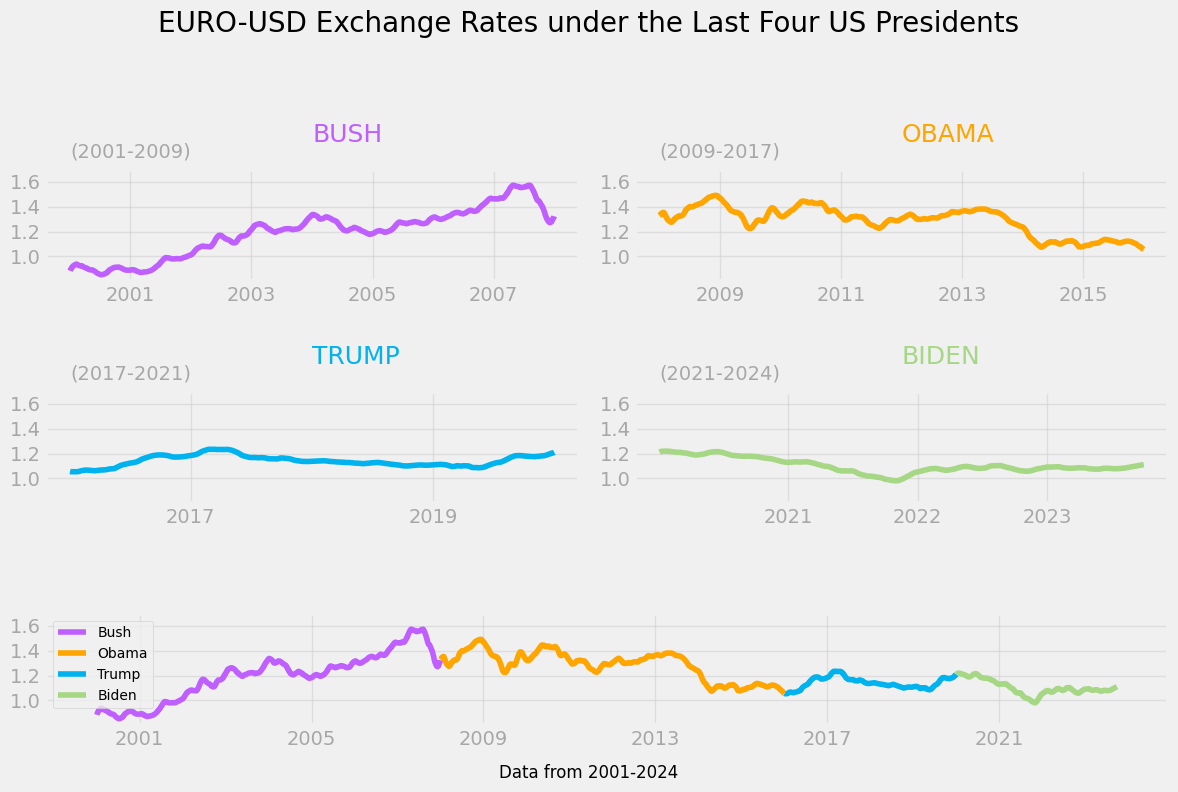

In [198]:
# Use the FiveThirtyEight style for the plot
style.use('fivethirtyeight')

# Set up grid using GridSpec for better control
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(3, 2, figure=fig)

# Create individual subplots for each president
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])  # Combined plot, spanning both columns at the bottom

# Set common y-axis limits and grid for all axes
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)

# Plotting for each president
# Bush (2001-2009)
ax1.plot(bush['Time'], bush['rolling_mean_USD'], color='#BF5FFF')
ax1.set_xticks(pd.date_range(bush['Time'].min(), bush['Time'].max(), freq='2Y'))
ax1.set_xticklabels(pd.date_range(bush['Time'].min(), bush['Time'].max(), freq='2Y').strftime('%Y'), alpha=0.3)
ax1.text(bush['Time'].mean(), 1.92, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(bush['Time'].min(), 1.8, '(2001-2009)', weight='bold', alpha=0.3)

# Obama (2009-2017)
ax2.plot(obama['Time'], obama['rolling_mean_USD'], color='#ffa500')
ax2.set_xticks(pd.date_range(obama['Time'].min(), obama['Time'].max(), freq='2Y'))
ax2.set_xticklabels(pd.date_range(obama['Time'].min(), obama['Time'].max(), freq='2Y').strftime('%Y'), alpha=0.3)
ax2.text(obama['Time'].mean(), 1.92, 'OBAMA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(obama['Time'].min(), 1.8, '(2009-2017)', weight='bold', alpha=0.3)

# Trump (2017-2021)
ax3.plot(trump['Time'], trump['rolling_mean_USD'], color='#00B2EE')
ax3.set_xticks(pd.date_range(trump['Time'].min(), trump['Time'].max(), freq='2Y'))
ax3.set_xticklabels(pd.date_range(trump['Time'].min(), trump['Time'].max(), freq='2Y').strftime('%Y'), alpha=0.3)
ax3.text(trump['Time'].mean(), 1.92, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(trump['Time'].min(), 1.8, '(2017-2021)', weight='bold', alpha=0.3)

# Biden (2021-present)
ax4.plot(biden['Time'], biden['rolling_mean_USD'], color='#A6D785')
ax4.set_xticks(pd.date_range(biden['Time'].min(), biden['Time'].max(), freq='1Y'))
ax4.set_xticklabels(pd.date_range(biden['Time'].min(), biden['Time'].max(), freq='1Y').strftime('%Y'), alpha=0.3)
ax4.text(biden['Time'].mean(), 1.92, 'BIDEN', fontsize=18, weight='bold', color='#A6D785')
ax4.text(biden['Time'].min(), 1.8, '(2021-2024)', weight='bold', alpha=0.3)

# Combined Plot (Bush-Obama-Trump-Biden)
ax5.plot(bush['Time'], bush['rolling_mean_USD'], color='#BF5FFF', label='Bush')
ax5.plot(obama['Time'], obama['rolling_mean_USD'], color='#ffa500', label='Obama')
ax5.plot(trump['Time'], trump['rolling_mean_USD'], color='#00B2EE', label='Trump')
ax5.plot(biden['Time'], biden['rolling_mean_USD'], color='#A6D785', label='Biden')
ax5.set_xticks(pd.date_range(bush['Time'].min(), biden['Time'].max(), freq='4Y'))
ax5.set_xticklabels(pd.date_range(bush['Time'].min(), biden['Time'].max(), freq='4Y').strftime('%Y'), alpha=0.3)
ax5.legend(loc='upper left', fontsize=10)

# Adding a title and a subtitle
plt.suptitle('EURO-USD Exchange Rates under the Last Four US Presidents', fontsize=20, weight='bold')
plt.figtext(0.5, 0.02, 'Data from 2001-2024', ha='center', fontsize=12)

# Adjust the layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()